In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sympy.abc import x, y, _clash1
from sympy.plotting import plot
from sympy import *
import pandas as pd
from numpy.linalg import solve
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

In [ ]:
class MQ:
  def __init__(self):
    self.alfas = []

  def fit_exp(self, x, y):
    self.alfas=[]
    lnY = np.log(y)
    self.fit(x, lnY, [lambda x:1, lambda x:x])
    self.alfas[0] = math.e**self.alfas[0]
    self.alfas[1] =- self.alfas[1]

  def fit(self,x,y,G):
    self.G=G
    A=[]
    B=[]
    j=0
    for g_lin in G:
      b=0
      for i in range(0,len(x)):
        b+=g_lin(x[i])*y[i]
      B.append(b)
      A.append([])
      for g_col in G:
        a=0
        for i in range(0,len(x)):
          a+=g_lin(x[i])*g_col(x[i])
        A[j].append(a)
      j+=1

    mat = np.append(A, np.array([B]).T,axis=1)
    #print('A: ', A)
    #print(mat)
    #print('B: ', B)
    #print('mat: ', mat)
    self.alfas = solve(A, B)
    #print(f"Alfas: {self.alfas}")

  def calc(self, x):
    s = 0
    #print(self.alfas)
    for i in range(0,len(self.G)):
      s+=self.alfas[i]*self.G[i](x)
    return s
  
  def calc_exp(self, x):
    return self.alfas[0]*(math.e**(-self.alfas[1]*x))

In [ ]:
def MinimoQuadrado(xi, yi):
  V = np.array([xi**2,xi**1,xi**0]).transpose()  
  a = ((np.linalg.inv((V.transpose()).dot(V))).dot(V.transpose())).dot(yi) 
  
  return a

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(url)
df

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
X = df['5.1'].values
Y = df['1.4'].values
mq = MQ()
x_line = np.linspace(4, 8, 149)

mq.fit(X, Y, [lambda x:np.log(x), lambda x:1])
y_line = list(map(lambda x: mq.calc(x), x_line))

mq.fit_exp(X, Y)
y_line2 = list(map(lambda x: mq.calc_exp(x), x_line))
print(y_line)
print(y_line2)

graph = go.Figure()
graph.update_layout(
  title="Iris Data Set",
  xaxis_title="X",
  yaxis_title="Y",
  font=dict(
      family="Courier New, monospace",
      size=18,
      color="RebeccaPurple"
  ),
  width=800, 
  height=500
)

graph.add_trace(go.Scatter(x=x_line, y=y_line,mode='lines', name='Linear'))
graph.add_trace(go.Scatter(x=x_line, y=y_line2,mode='lines', name='Exponecial'))
graph.add_trace(go.Scatter(x=X, y=Y,mode='markers', name='Iris'))
graph.show()

[-0.2720360894701006, -0.19837792822540834, -0.12521246739791714, -0.052533159401022544, 0.01966641369480371, 0.09139254356289683, 0.16265139891054758, 0.2334490286626245, 0.3037913650428621, 0.37368422655668176, 0.443133320879328, 0.5121442476528895, 0.5807225011956341, 0.6488734731269581, 0.7166024549110439, 0.783914640322255, 0.8508151278351512, 0.9173089229418281, 0.9834009403992781, 1.0490960064092363, 1.1143988607329653, 1.1793141587432956, 1.2438464734160988, 1.308000297263419, 1.371780044210162, 1.4351900514164662, 1.4982345810475124, 1.5609178219926179, 1.623243891535381, 1.6852168369764726, 1.7468406372107737, 1.8081192042602616, 1.8690563847642458, 1.9296559614283275, 1.9899216544333989, 2.049857122806074, 2.109465965751788, 2.168751723951715, 2.2277178808247875, 2.2863678637558458, 2.3447050452910503, 2.402732744301577, 2.460454227116621, 2.517872708626637, 2.574991353357799, 2.6318132765185496, 2.688341545019096, 2.744579178464676, 2.8005291501234986, 2.8561943878699516, 2

In [ ]:
X = df['5.1'].values
Y = df['1.4'].values

a = MinimoQuadrado(X,Y)
xx = np.linspace(4,8)  
plt.plot(X,Y,'ro',xx,np.polyval(a,xx),'b-')  
plt.grid()
plt.show()

plt.scatter(x=X, y=Y, color='blue', s=50, alpha=.5)

"a = MinimoQuadrado(X,Y)\nxx = np.linspace(4,8)  \nplt.plot(X,Y,'ro',xx,np.polyval(a,xx),'b-')  \nplt.grid()\nplt.show()\n\nplt.scatter(x=X, y=Y, color='blue', s=50, alpha=.5)"

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00424/2014%20and%202015%20CSM%20dataset.xlsx'
df = pd.read_excel(url)
df

,Movie,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers
0,13 Sins,2014,6.3,8,9130,4000000.0,45.0,1,0,3280543,4632,425,636,1120000.0
1,22 Jump Street,2014,7.1,1,192000000,50000000.0,3306.0,2,2,583289,3465,61,186,12350000.0
2,3 Days to Kill,2014,6.2,1,30700000,28000000.0,2872.0,1,0,304861,328,34,47,483000.0
3,300: Rise of an Empire,2014,6.3,1,106000000,110000000.0,3470.0,2,0,452917,2429,132,590,568000.0
4,A Haunted House 2,2014,4.7,8,17300000,3500000.0,2310.0,2,0,3145573,12163,610,1082,1923800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,Child 44,2015,6.4,4,1210000,50000000.0,66.0,1,4,3701061,9325,641,1859,NaN
227,Aloha,2015,5.5,15,21000000,37000000.0,2815.0,1,13,7119456,18803,1128,2290,NaN
228,Unfinished Business,2015,5.4,8,10200000,35000000.0,2777.0,1,7,3450614,6823,325,409,NaN
229,War Room,2015,5.4,1,12300000,3000000.0,NaN,1,10,66872,400,67,201,NaN


In [ ]:
X = df['Ratings'][:100]
Y = df['Budget'][:100]

mq = MQ()
x_line = np.linspace(3, 8.5)

mq.fit(X, Y, [lambda x: x, lambda x:1])
y_line = list(map(lambda x: mq.calc(x), x_line))

mq.fit_exp(X, Y)
y_line2 = list(map(lambda x: mq.calc_exp(x), x_line))
print(y_line)
print(y_line2)

'''plt.scatter(X,Y)
plt.plot(x_line, y_line, color="red")
plt.plot(x_line, y_line2, color="green")
plt.show()'''
graph = go.Figure()
graph.update_layout(
  title="CSM (Conventional and Social Media Movies) Dataset 2014 and 2015 Data Set",
  xaxis_title="X",
  yaxis_title="Y",
  font=dict(
      family="Courier New, monospace",
      size=18,
      color="RebeccaPurple"
  ),
  width=1000, 
  height=500
)

graph.add_trace(go.Scatter(x=x_line, y=y_line,mode='lines', name='Linear'))
graph.add_trace(go.Scatter(x=x_line, y=y_line2,mode='lines', name='Exponecial'))
graph.add_trace(go.Scatter(x=X, y=Y,mode='markers', name='Conventional and Social Media Movies'))
graph.show()

[-33628778.87543757, -30984422.672426865, -28340066.469416127, -25695710.266405404, -23051354.063394666, -20406997.860383943, -17762641.65737322, -15118285.454362497, -12473929.251351759, -9829573.04834105, -7185216.845330313, -4540860.64231959, -1896504.439308852, 747851.7637018859, 3392207.966712594, 6036564.169723332, 8680920.372734055, 11325276.575744778, 13969632.7787555, 16613988.981766239, 19258345.184776947, 21902701.3877877, 24547057.590798408, 27191413.793809146, 29835769.996819884, 32480126.199830577, 35124482.402841315, 37768838.60585205, 40413194.80886276, 43057551.01187353, 45701907.21488424, 48346263.417894974, 50990619.62090571, 53634975.82391642, 56279332.02692716, 58923688.22993787, 61568044.432948574, 64212400.63595931, 66856756.83897005, 69501113.04198079, 72145469.2449915, 74789825.44800223, 77434181.65101297, 80078537.85402371, 82722894.05703442, 85367250.26004513, 88011606.46305586, 90655962.66606663, 93300318.86907734, 95944675.07208805]
[1949999.7377951273, 210

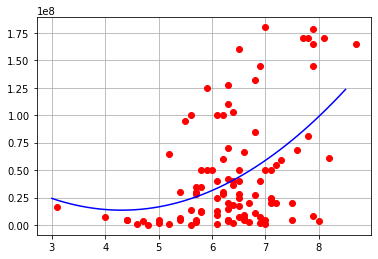

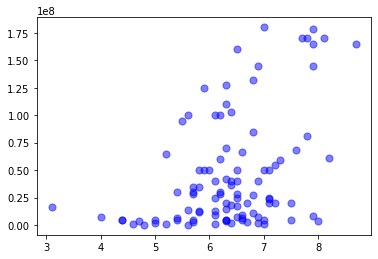

In [ ]:
X = df['Ratings'][:100]
Y = df['Budget'][:100]

a = MinimoQuadrado(X,Y)
xx = np.linspace(3, 8.5)
plt.plot(X,Y,'ro',xx,np.polyval(a,xx),'b-')  
plt.grid()
plt.show()

plt.scatter(x=X, y=Y, color='blue', s=50, alpha=.5)

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data'
df = pd.read_csv(url)
df

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [ ]:
X = df['Monetary (c.c. blood)']
Y = df['Frequency (times)']

mq = MQ()
x_line = np.linspace(0, max(X))

mq.fit(X, Y, [lambda x:x, lambda x:1])
y_line = list(map(lambda x: mq.calc(x), x_line))

mq.fit_exp(X, Y)
y_line2 = list(map(lambda x: mq.calc_exp(x), x_line))
print(y_line)
print(y_line2)

'''plt.scatter(X,Y)
plt.plot(x_line, y_line, color="red")
plt.plot(x_line, y_line2, color="green")
plt.show()'''
graph = go.Figure()
graph.update_layout(
  title="Blood Transfusion Service Center Data Set",
  xaxis_title="X",
  yaxis_title="Y",
  font=dict(
      family="Courier New, monospace",
      size=18,
      color="RebeccaPurple"
  ),
  width=800, 
  height=500
)

graph.add_trace(go.Scatter(x=x_line, y=y_line,mode='lines', name='Linear'))
graph.add_trace(go.Scatter(x=x_line, y=y_line2,mode='lines', name='Exponecial'))
graph.add_trace(go.Scatter(x=X, y=Y,mode='markers', name='Blood Transfusion'))
graph.show()

[0.0, 1.0204081632653061, 2.0408163265306123, 3.0612244897959187, 4.081632653061225, 5.102040816326531, 6.122448979591837, 7.142857142857143, 8.16326530612245, 9.183673469387756, 10.204081632653063, 11.224489795918368, 12.244897959183675, 13.26530612244898, 14.285714285714286, 15.306122448979592, 16.3265306122449, 17.346938775510203, 18.367346938775512, 19.387755102040817, 20.408163265306126, 21.428571428571427, 22.448979591836736, 23.46938775510204, 24.48979591836735, 25.510204081632654, 26.53061224489796, 27.551020408163264, 28.571428571428573, 29.59183673469388, 30.612244897959183, 31.63265306122449, 32.6530612244898, 33.673469387755105, 34.69387755102041, 35.714285714285715, 36.734693877551024, 37.755102040816325, 38.775510204081634, 39.795918367346935, 40.81632653061225, 41.83673469387755, 42.857142857142854, 43.87755102040817, 44.89795918367347, 45.91836734693878, 46.93877551020408, 47.95918367346939, 48.9795918367347, 50.0]
[1.7575098219296919, 2.010977936907525, 2.3010012304162

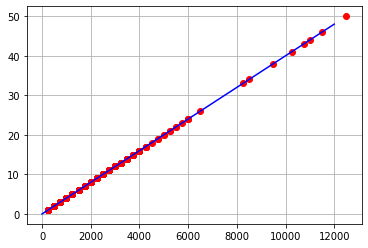

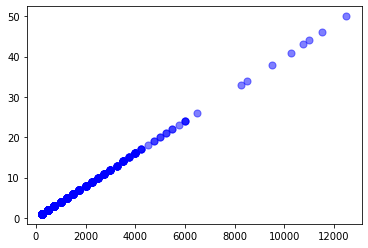

In [ ]:
X = df['Monetary (c.c. blood)']
Y = df['Frequency (times)']
a = MinimoQuadrado(X,Y)
xx = np.linspace(0, 12000)  
plt.plot(X,Y,'ro',xx,np.polyval(a,xx),'b-')  
plt.grid()
plt.show()

plt.scatter(x=df['Monetary (c.c. blood)'], y=df['Frequency (times)'], color='blue', s=50, alpha=.5)